# Тема "Нейронные сети и глубинное обучение"

<h2 style="text-align: center;"><b>Convolution и Pooling операции</b></h2>

### Convolution (свертка)

В этой работе будут рассмотрены вопросы, связанные с тем как свертки влияют на изображение. Также будет показано как вычисляются свертки и пулинги от различных изображений.

Рассмотрим алгоритм свертки:

<img src="https://i0.wp.com/syncedreview.com/wp-content/uploads/2017/05/7.gif?resize=395%2C449&ssl=1" width=450 height=400>

Берется фильтр размера FxF, умножается на область изображения размером FxF поэлементно, складывается получившееся поэлементное произведение и после записываем это число в результирующий тензор. Сама операция немного напоминает скалярное произведение, только для тензоров.

Если картинка размера HxWx3, то фильтр будет размер FxFx3, и поэлементное произведение будет по всему объему, то есть третья размерность фильтра всегда свопадает с третьей размерностью входного тензора (не считая MobileNet, там есть depthwise separable convolution).

Напомним, что stride - это размер шага окна свертка по осям x и y (обычно совпадают, но вполне могут быть и разными). 

---

Посмотрим на то, как применение свертки с определенными фильтрами влияет на изображение.

Посмотрим, как будет меняться картинка в зависимости от фильтра:

In [5]:
from PIL import Image          # импортируем необходимые библиотеки
from math import ceil, sqrt
from math import floor

import matplotlib.pyplot as plt
import numpy as np

In [3]:
def convolution(a, b):        # пропишем функцию свертки, она соответствуте описанию, которое приведено выше
    sum = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            sum += a[i][j] * b[i][j]
    return sum

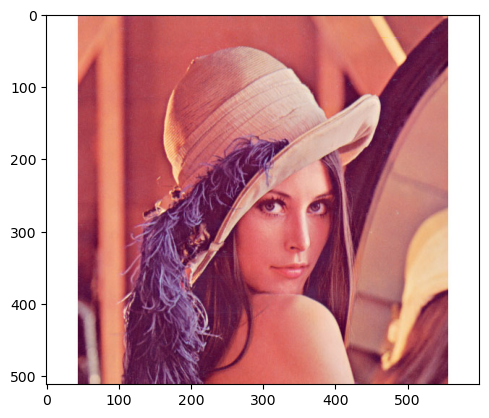

In [25]:
img = Image.open('lena.jpg') # загружаем изображение, с которым будем работать
pixels = img.load()

plt.imshow(img);


In [26]:
img_convolved = img.copy()
pixels2 = img_convolved.load()

Заготовим несколько фильтров:

In [27]:

# filter = [
#     [-1, -1, 0, 0, 0],
#     [0, -1, -1, -1, 0],
#     [0, -1, 9, -1, 0],
#     [0, -1, -1, -1, 0],
#     [0, 0, 0, 0, 0]
# ]


# filter = [                   # активным является данный фильтр, но можно использовать и другие
#     [-1, -1, -1, -1, -1],
#     [-1, -1, -1, -1, -1],
#     [-1, -1, 4, -1, -1],
#     [-1, -1, -1, -1, -1],
#     [-1, -1, -1, -1, -1]
# ]


# filter = [
#     [0, 0, 0, 1, 0, 0, 0],
#     [0, 0, 1, 1, 1, 0, 0],
#     [0, 1, 1, 1, 1, 1, 0],
#     [1, 1, 1, 1, 1, 1, 1],
#     [0, 1, 1, 1, 1, 1, 0],
#     [0, 0, 1, 1, 1, 0, 0],
#     [0, 0, 0, 1, 0, 0, 0]
# ]



filter = [
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
]


'''
filter = [
    [0.5, 1.5, 2, 1.5, 0.5],
    [1.5, 3.5, 5, 3.5, 1.5],
    [  2,   5, 10,  5,   2],
    [1.5, 3.5, 5, 3.5, 1.5],
    [0.5, 1.5, 2, 1.5, 0.5]
]
''';

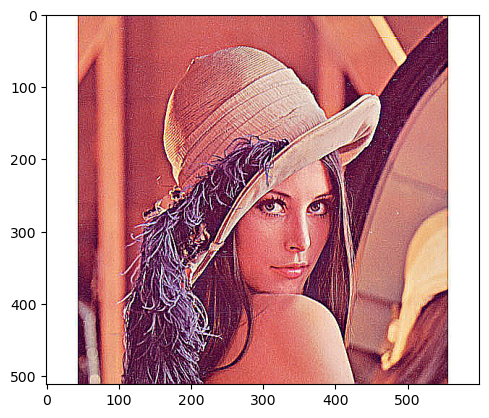

In [28]:
div = 0
for i in range(len(filter)):
    for j in range(len(filter[0])):
        div += filter[i][j]
if div == 0:
    div = 1

for i in range(floor(len(filter)/2), img.width - floor(len(filter)/2)):
    for j in range(floor(len(filter)/2), img.height - floor(len(filter)/2)):
        matrR = []
        matrG = []
        matrB = []
        for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
            rowR = []
            rowG = []
            rowB = []
            for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                r, g, b = pixels[i + n, j + m]
                rowR.append(r)
                rowG.append(g)
                rowB.append(b)
            matrR.append(rowR)
            matrG.append(rowG)
            matrB.append(rowB)

        r = np.clip(round(convolution(matrR, filter) / div), 0, 255)
        g = np.clip(round(convolution(matrG, filter) / div), 0, 255)
        b = np.clip(round(convolution(matrB, filter) / div), 0, 255)

        pixels2[i, j] = (r, g, b)

plt.imshow(img_convolved);

Как видим изображение после применения к нему фильтра изменилось, в данном случае появилось размытие.

Попробуем поменять фильтр и посмотреть, что будет.

In [11]:
filter = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

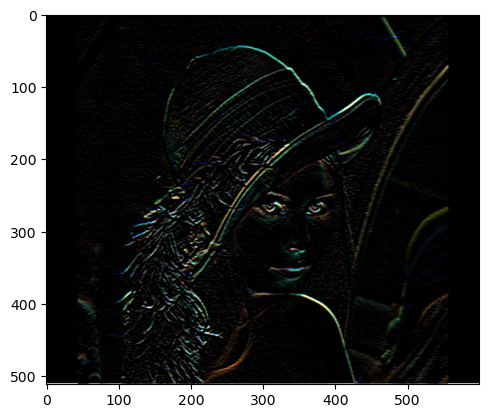

In [12]:
div = 0
for i in range(len(filter)):
    for j in range(len(filter[0])):
        div += filter[i][j]
if div == 0:
    div = 1

for i in range(floor(len(filter)/2), img.width - floor(len(filter)/2)):
    for j in range(floor(len(filter)/2), img.height - floor(len(filter)/2)):
        matrR = []
        matrG = []
        matrB = []
        for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
            rowR = []
            rowG = []
            rowB = []
            for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                r, g, b = pixels[i + n, j + m]
                rowR.append(r)
                rowG.append(g)
                rowB.append(b)
            matrR.append(rowR)
            matrG.append(rowG)
            matrB.append(rowB)

        r = np.clip(round(convolution(matrR, filter) / div), 0, 255)
        g = np.clip(round(convolution(matrG, filter) / div), 0, 255)
        b = np.clip(round(convolution(matrB, filter) / div), 0, 255)

        pixels2[i, j] = (r, g, b)

plt.imshow(img_convolved);

Сейчас мы использовали маленький фильтр (сравните их размеры) и изображение потеряло цвет, мы видим лишь отдельные контуры, однако для некоторых задач подобная обработка может оказаться полезной.

---

In [13]:
filter = [
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
]

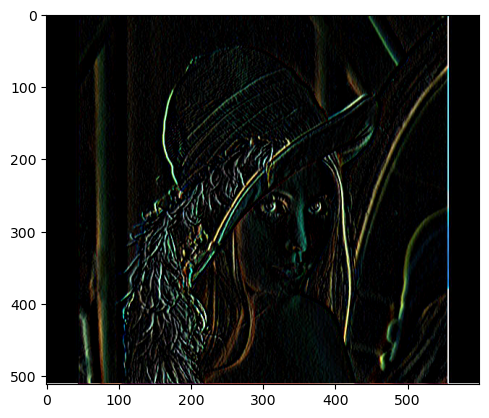

In [14]:
div = 0
for i in range(len(filter)):
    for j in range(len(filter[0])):
        div += filter[i][j]
if div == 0:
    div = 1

for i in range(floor(len(filter)/2), img.width - floor(len(filter)/2)):
    for j in range(floor(len(filter)/2), img.height - floor(len(filter)/2)):
        matrR = []
        matrG = []
        matrB = []
        for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
            rowR = []
            rowG = []
            rowB = []
            for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                r, g, b = pixels[i + n, j + m]
                rowR.append(r)
                rowG.append(g)
                rowB.append(b)
            matrR.append(rowR)
            matrG.append(rowG)
            matrB.append(rowB)

        r = np.clip(round(convolution(matrR, filter) / div), 0, 255)
        g = np.clip(round(convolution(matrG, filter) / div), 0, 255)
        b = np.clip(round(convolution(matrB, filter) / div), 0, 255)

        pixels2[i, j] = (r, g, b)

plt.imshow(img_convolved);

Мы снова используем фильтр 3х3, поэтому у нас снова видны лишь контуры, однако по сравнению с прошлым фильтром на изображении стали видны другие контуры.

Меняя фильтры и повторяя алгоритм свертки можно получить самые разные аспекты/детали конкретного изображения. По сути сверточная нейронная сеть работает сходным образом - находит на изображении определенные детали, по которым потом сможет идентифицировать объекты, изображенные на нем.

Давайте немного потренируемся в вычислении размера результата применения свертки к картинке:

Вычислим размер результата после применения свертки.

Здесь $I$ -- размеры входного изображения, $f$ -- размеры фильтра:

$I$ = (50, 50, 3), $f$ = (3, 3, 3), $stride$ = 1. Вычисляем:  
по ширине: 50 - 3 + 1 = 48,  
по высоте: 50 - 3 + 1 = 48,   
то есть размер результата будет (48, 48, 1)

---

**Упражнение:**

Попробуйте самостоятельно вычислить размеры для следующих двух случаев:

1). $I$ = (1024, 768, 3), $f$=(5,5), $stride$ = 2

2). $I$ = (500, 700, 5), $f$=(7,4), $stride$ = 2

Напомним, что $padding$ -- это окружение картинки нулями (или чем-то другим) для того, чтобы придать изображению после свертки нужный размер (пэддинг делается до свертки).

Попробуйте самостоятельно прийти к общей формуле для $I$ = (H, W, C), $f$=(F, F) с учетом padding'а.

---

### Pooling

Pooling (пулинг) - операция, применяемая для уменьшения размерности по ширине и по высоте. Можно брать очень много операций в качестве пулинга, например, минимум из элементов, максимум, среднее, сумму и т.д.

Обычно используется max- и avg-pooling.

Пример применения max-pooling'а:

<img src="https://i.stack.imgur.com/W9a9n.jpg">

Примеры применения max и avg pooling'ов:


<img src="https://www.researchgate.net/profile/Zenghui_Wang2/publication/317496930/figure/fig1/AS:551445004066816@1508486142257/Average-versus-max-pooling.png">

Если на вход подается изображение с несколькими каналами, то пулинг берется поканально, то есть если это цветная картинка HxWxC, и мы применяем к ней pooling 2x2, то получим на выходе (H // 2) x (W // 2) x C